In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv', encoding='latin1', on_bad_lines='skip')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4784,spam,Urgent -call 09066649731from Landline. Your co...,NaN,NaN,NaN
2128,ham,Well I'm going to be an aunty!,NaN,NaN,NaN
41,ham,"Did I forget to tell you ? I want you , I need...",NaN,NaN,NaN
2562,ham,"Yeah I am, so I'll leave maybe 7ish?",NaN,NaN,NaN
1981,ham,"Sorry, I'll call later in meeting any thing re...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# since last 3 columns are redundant, we drop them
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.sample(5)

,v1,v2
5045,ham,Desires- u going to doctor 4 liver. And get a ...
3838,ham,Erm Û_ ill pick you up at about 6.45pm. That'...
3593,spam,Do you want a New Nokia 3510i Colour Phone Del...
2522,ham,Dunno lei... I might b eatin wif my frens... I...
2251,ham,hope things went well at 'doctors' ;) reminds ...


In [8]:
df.rename(columns = {'v1':'target', 'v2':'text'}, inplace = True)
df.sample(5)

,target,text
4191,ham,&lt;#&gt; w jetton ave if you forgot
3435,ham,If india win or level series means this is rec...
3051,ham,Please leave this topic..sorry for telling that..
4512,spam,Money i have won wining number 946 wot do i do...
2548,ham,Honestly i've just made a lovely cup of tea an...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])
df.sample(5)

,target,text
1284,0,But if she.s drinkin i'm ok.
3967,0,Did u turn on the heater? The heater was on an...
4679,0,"That's cool he'll be here all night, lemme kno..."
3841,0,"chile, please! It's only a &lt;DECIMAL&gt; h..."
968,0,Are you willing to go for aptitude class.


In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()


target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df =df.drop_duplicates(keep='first')

In [15]:
df.shape

(5169, 2)

In [16]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1b3302d13d0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

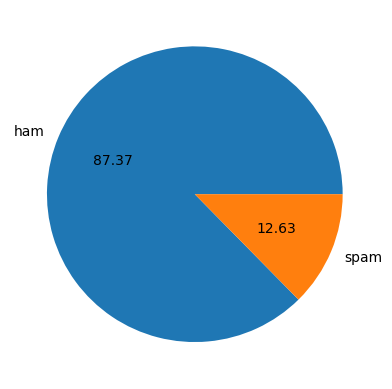

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')

In [20]:
import nltk


In [39]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [40]:
df['num characters']= df['text'].apply(len)

In [41]:
df.head()

,target,text,num characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [47]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [48]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [49]:
df.head()

,target,text,num characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num characters', 'num_words', 'num_sentences']].describe()

,num characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [51]:
df[df['target']==0][['num characters', 'num_words', 'num_sentences']].describe()

,num characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [52]:
df[df['target']==1][['num characters', 'num_words', 'num_sentences']].describe()

,num characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [53]:
import seaborn as sns

<Axes: ylabel='Count'>

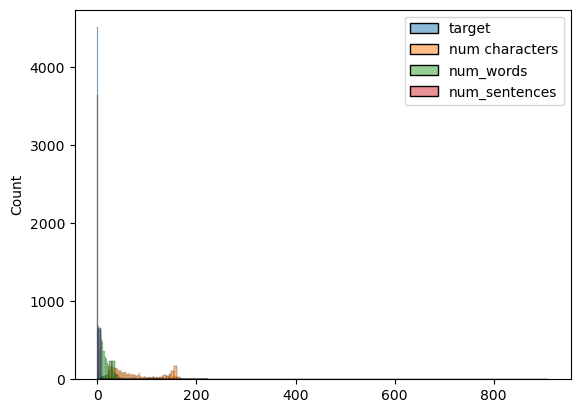

In [55]:
sns.histplot(df[df['target']==0])
sns.histplot(df[df['target']==1], color='red')